## The Rise in-demand for Data Scientist
Data science jobs are some of the fastest-growing, most in-demand in technology. Since 2012, Data Scientist roles have increased by 650 percent, and this rise shows no sign of stopping. The U.S. Bureau of Labor Statistics predicts that the demand for data science skills will increase another 27.9 percent by 2026. And, according to a report from McKinsey, that spells a shortage of between 140,000 and 190,000 people with analytical skills in the U.S. alone—not to mention another 1.5 million managers and analysts who will be required to understand how data analysis drives decision-making.

Data Scientist salaries have also risen with demand; Data Scientists can typically expect to make six figures. Demand also translates into an ability to relocate far more easily—from city to city, and even internationally.

The goal of this study is to carry out an extensive Exploratory Data Analysis (EDA) on the industry with focus on the following:

 1. Explore every feature in the dataset;
 2. Work Year Analysis(with Salary, Remote Ratio);
 3. Experience Level Analysis (with Employment Type, Top 3 Job Title, Company Size)

 4. Company Location Analysis (with Experience Level)

 5. Salary Analysis (with Work Year, Experience Level, Company Size, Job Title, Remote Ratio)

### Dataset Dictionary

The column headers represent the following:

work_year - The year the salary was paid

experience_level - The experience level in the job during the year with the following possible values: EN Entry-level / Junior                    MI Mid-level / Intermediate SE Senior-level / Expert EX Executive-level / Director

employment_type - The type of employement for the role: PT Part-time FT Full-time CT Contract FL Freelance

job_title - The role worked in during the year

salary - The total gross salary amount paid

salary_currency - The currency of the salary paid as an ISO 4217 currency code

salaryinusd - The salary in USD (FX rate divided by avg. USD rate for the respective year via fxdata.foorilla.com)

employee_residence - Employee's primary country of residence in during the work year as an ISO 3166 country code

remote_ratio - The overall amount of work done remotely, possible values are as follows: 0 No remote work (less than 20%) 50                  Partially remote 100 Fully remote (more than 80%)

company_location - The country of the employer's main office or contracting branch as an ISO 3166 country code

company_size - The average number of people that worked for the company during the year: S less than 50 employees (small) M 50                to 250 employees (medium) L more than 250 employees (large)


In [1]:
# Importing relevent libraries to be used
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# loading the  dataset
data = pd.read_csv('C:\\Users\\user\\Desktop\\10Alytics\\ds_salaries.csv')

In [4]:
# viewing the head and tail of the dataset
data

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [5]:
# General information of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


A key indicator to look out for in the general information of the dataset is the Non-Null Count which indicates if there are any missing values in the dataset.
Fortunately, the dataset did not contain missing values.

In [6]:
# Statistical description of the dataset
data.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


The statistical description of the dataset highlights the degree of central tendency and dispersion of the dataset.
The 'min', 'mean', and 'max' values of the columns also show that, for all the columns, the max vaues are not so far from the mean values considering the distance of the min value too. This hints the presence of outliers are minimal, hence excusable.

In [7]:
# Double checking for missing values in the dataset
data.isna().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

The absence of missing values is confirmed

### Exploratory Data Analysis (EDA)
Performing EDA helps us dig into the data to uncover various trends and underlying patterns in the dataset.

In [9]:
# Exploring correlations between all the columns
data.corr()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
Unnamed: 0,1.000000,0.886550,-0.096250,0.167025,0.095000
work_year,0.886550,1.000000,-0.087577,0.170493,0.076314
salary,-0.096250,-0.087577,1.000000,-0.083906,-0.014608
salary_in_usd,0.167025,0.170493,-0.083906,1.000000,0.132122
remote_ratio,0.095000,0.076314,-0.014608,0.132122,1.000000


### Univariate Analysis

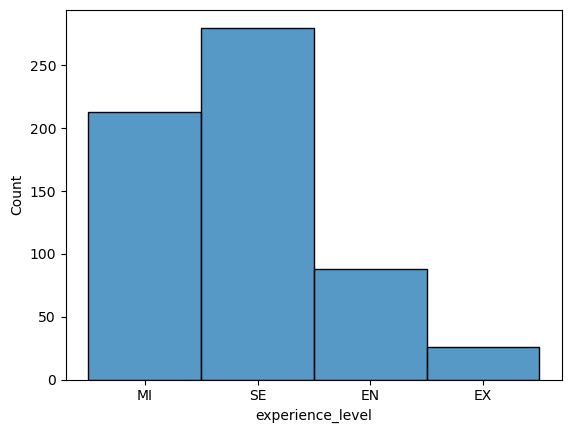

In [11]:
sns.histplot(data['experience_level']);

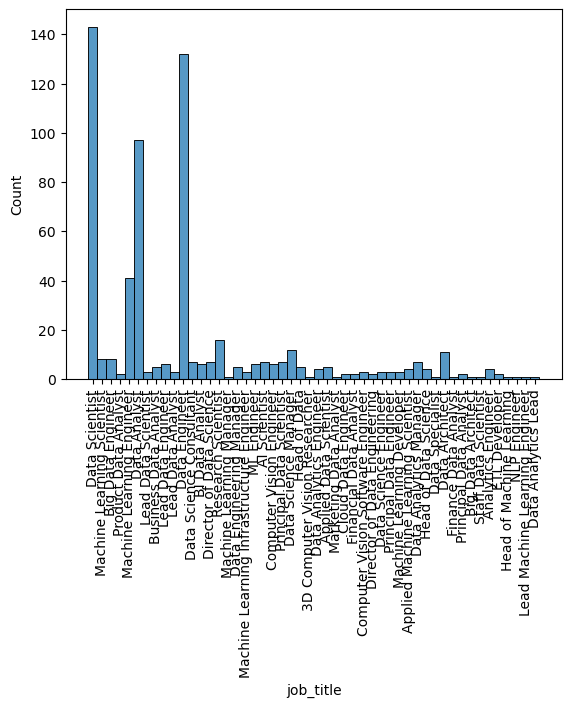

In [118]:
s = sns.histplot(data['job_title']);
plt.xticks(rotation=90);

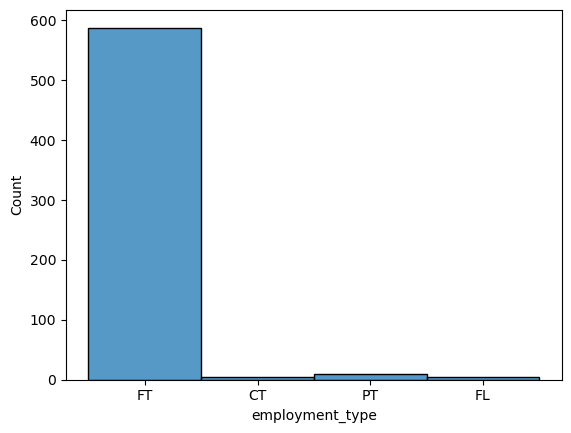

In [34]:
sns.histplot(data['employment_type']);

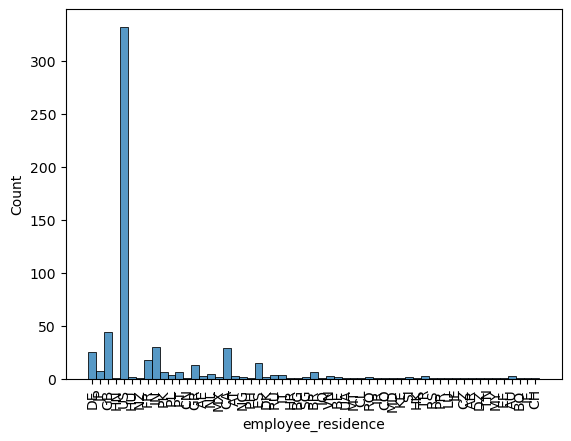

In [117]:
g = sns.histplot(data['employee_residence']);
plt.xticks(rotation=90);

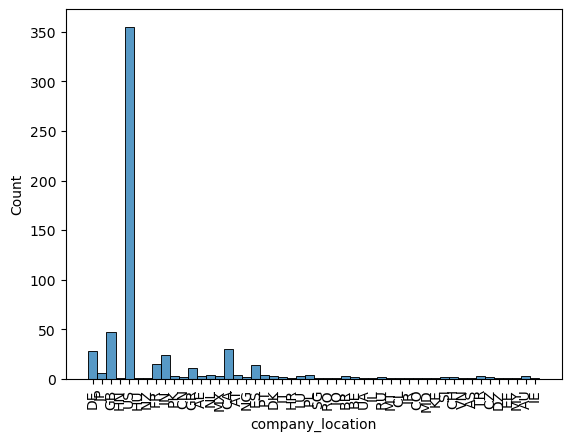

In [119]:
sns.histplot(data['company_location']);
plt.xticks(rotation=90);

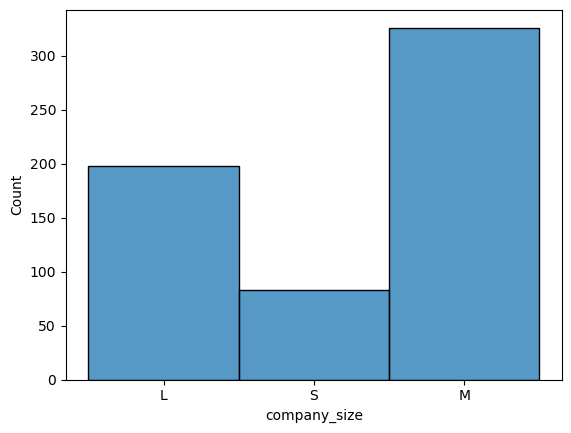

In [37]:
sns.histplot(data['company_size']);

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


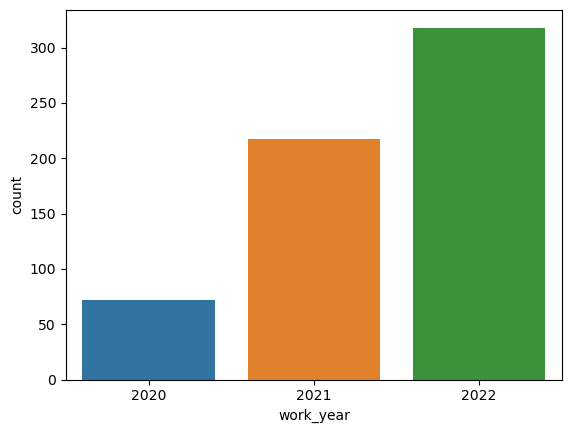

In [39]:
sns.countplot(data['work_year']);

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


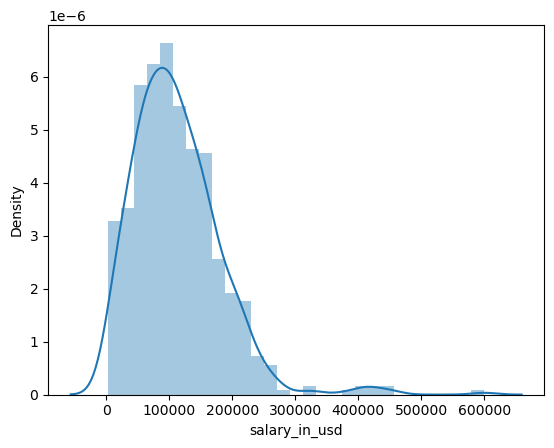

In [47]:
sns.distplot(data['salary_in_usd']);

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


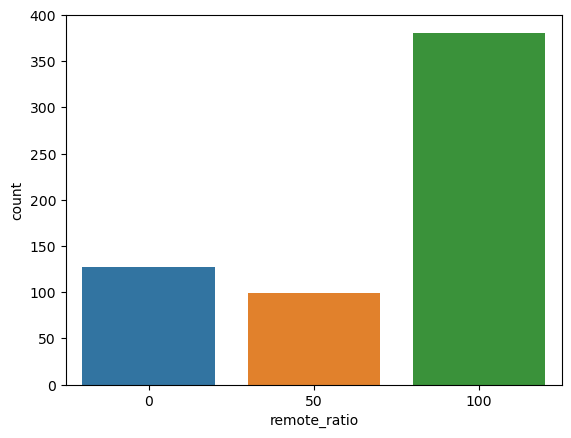

In [49]:
sns.countplot(data['remote_ratio']);

### Multi-Variate Analysis

1. Work year Analysis

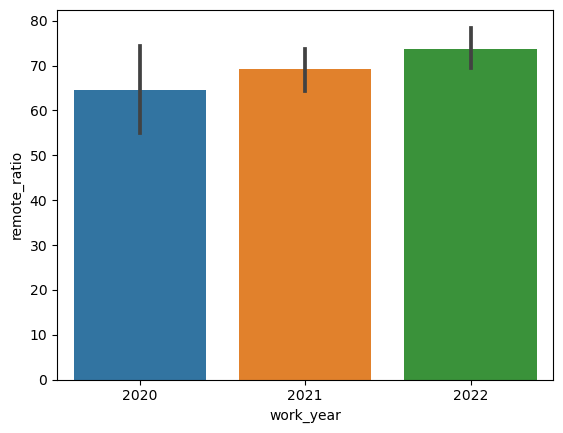

In [54]:
sns.barplot(x='work_year', y='remote_ratio', data=data);

 2. Experiment Analysis

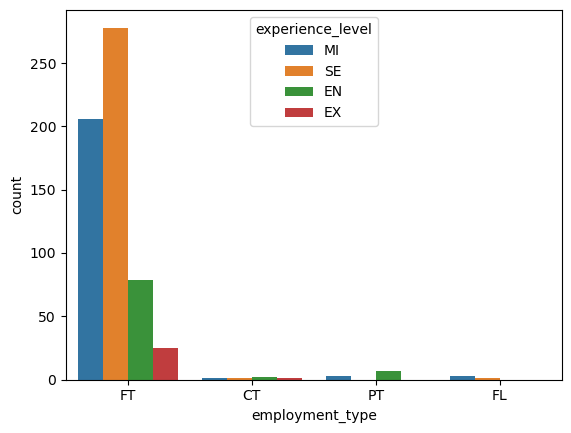

In [68]:
sns.countplot(x='employment_type',hue='experience_level',data = data);

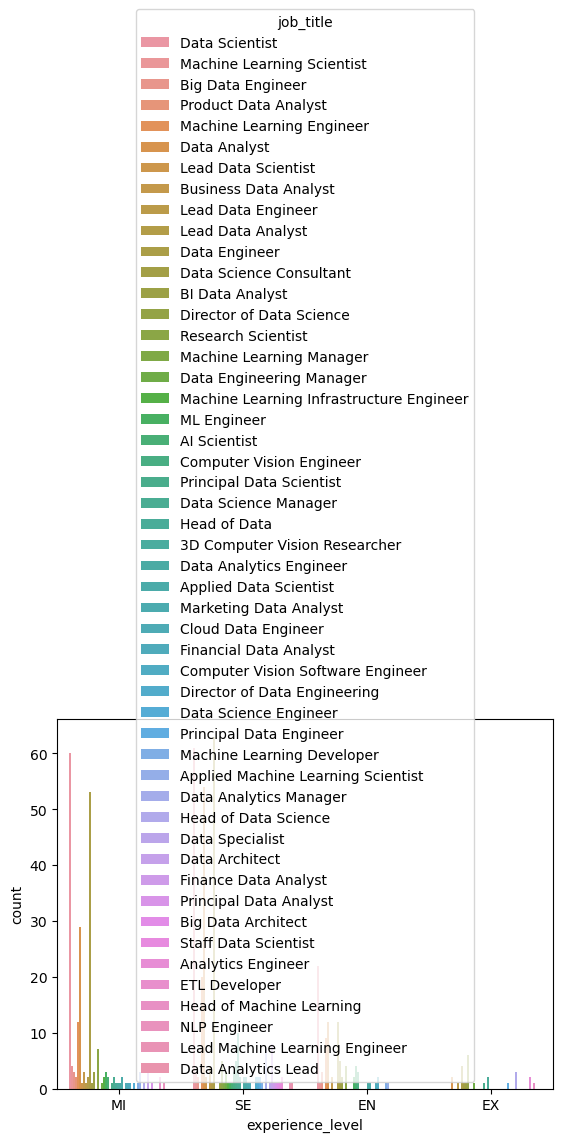

In [76]:
sns.countplot(x='experience_level',hue='job_title',data = data);

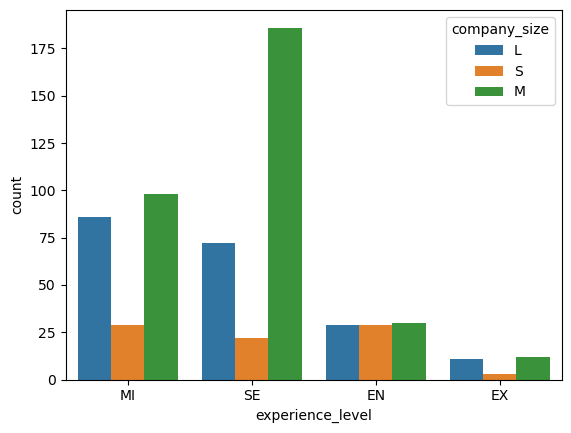

In [79]:
sns.countplot(x='experience_level',hue='company_size',data = data);

3. Company Location Analysis

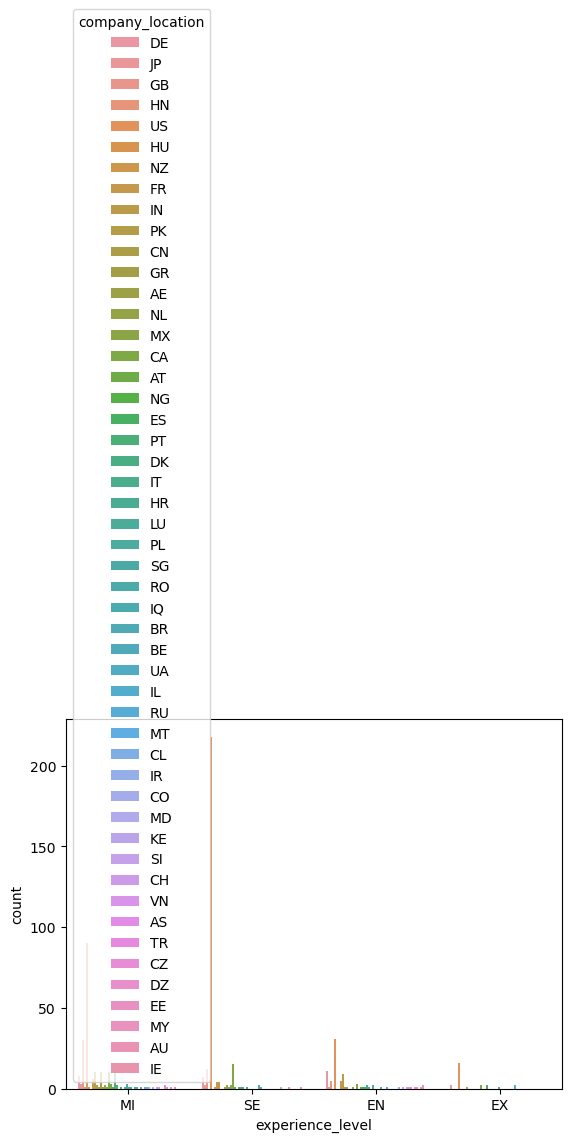

In [85]:
sns.countplot(x='experience_level',hue='company_location',data = data);

4. Salary Analysis

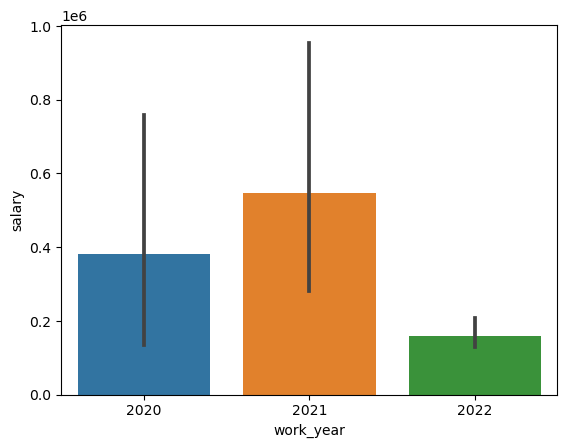

In [90]:
sns.barplot(x='work_year', y='salary', data=data);

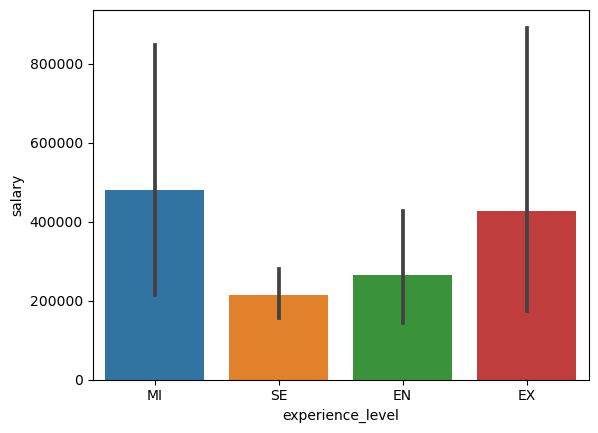

In [93]:
sns.barplot(x='experience_level', y='salary', data=data);

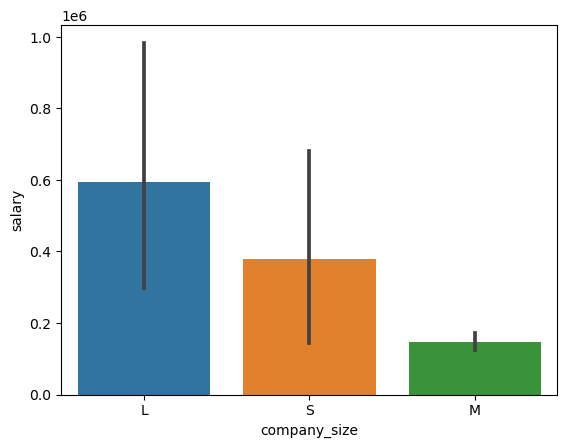

In [94]:
sns.barplot(x='company_size', y='salary', data=data);

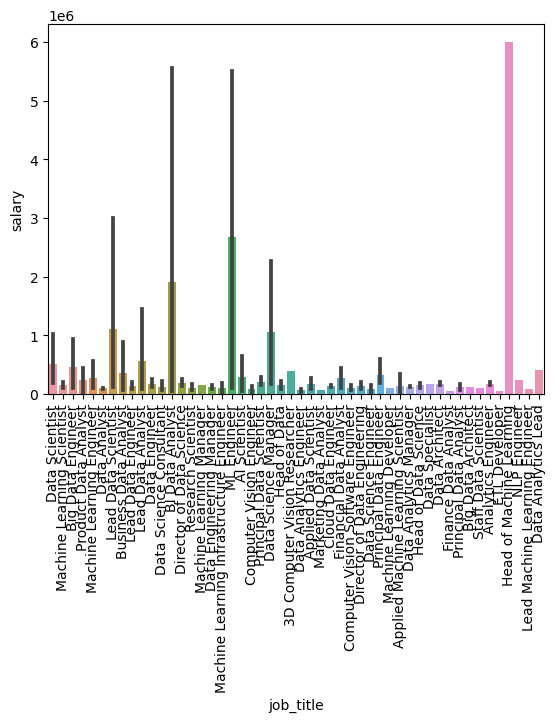

In [116]:
sns.barplot(x='job_title', y='salary', data=data);
plt.xticks(rotation=90);

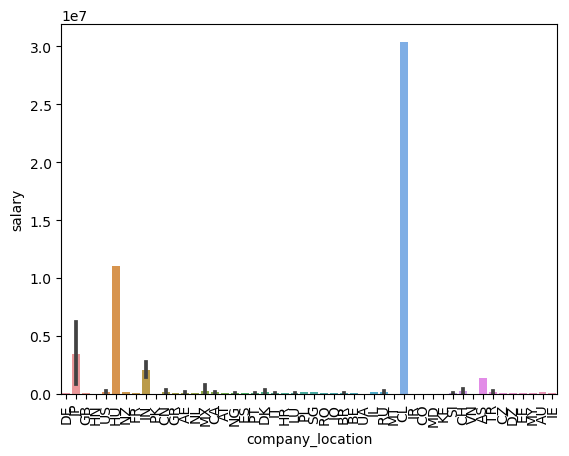

In [115]:
sns.barplot(x='company_location', y='salary', data=data);
plt.xticks(rotation=90);

### Findings

Since the year 2020, there is an approximate 20% of workers who are gravitating towards working remotely. 

Senior level professionals are known to work full time than other level professionals, with Executive level professionals least working full time.
However, senior level and intermediate level professionals are the most technically experienced professionals across the various data science roles. With Lead Data Analyst, Lead Data Scientist and Director of Data Science at the fore-front.

The workforce dynamics show that Senior level and and Intermediate level professionals are found more in medium sized comapnies than large or small companies. While, Small companies barely have executive professionals. However, Large companies pay way higher than medium sized companies and small sized companies.

Machine learning showed to be the most lucrative segment of data science between 2020-2022, in terms of salary, with ML engineer, Head of ML leading, BI data analyst, and Lead data scientist at the top. 


